In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Choose # of topics

In [232]:
with open("parseout1966.txt", 'r') as f:
    parseout1966 = json.load(f)

In [233]:
documents = parseout1966

In [234]:
from gensim import corpora, models, similarities

In [235]:
dictionary = corpora.Dictionary(documents)
dictionary.filter_extremes(no_below=5,no_above=0.75,keep_n=100000)
dictionary.compactify()

In [238]:
corpus = [dictionary.doc2bow(document) for document in documents]

In [245]:
#corpus[:2]

In [240]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
from gensim import corpora, models, similarities, matutils
import scipy.stats as stats
import matplotlib.pyplot as plt

In [241]:
def sym_kl(p,q):
    return np.sum([stats.entropy(p,q),stats.entropy(q,p)])

In [242]:
def arun(corpus,dictionary,min_topics,max_topics,step):
    kl = []
    for i in range(min_topics,max_topics,step):
        lda = models.ldamodel.LdaModel(corpus=corpus,
            id2word=dictionary,chunksize=170,num_topics=i)
        m1 = lda.expElogbeta
        U,cm1,V = np.linalg.svd(m1)
        #Document-topic matrix
        lda_topics = lda[corpus]
        m2 = matutils.corpus2dense(lda_topics, lda.num_topics).transpose()
        cm2 = l.dot(m2)
        cm2 = cm2 + 0.0001
        cm2norm = np.linalg.norm(l)
        cm2 = cm2/cm2norm
        kl.append(sym_kl(cm1,cm2))
    return kl

In [243]:
l = np.array([sum(cnt for _, cnt in doc) for doc in corpus])
kl = arun(corpus,dictionary,min_topics=1,max_topics=100,step=5)

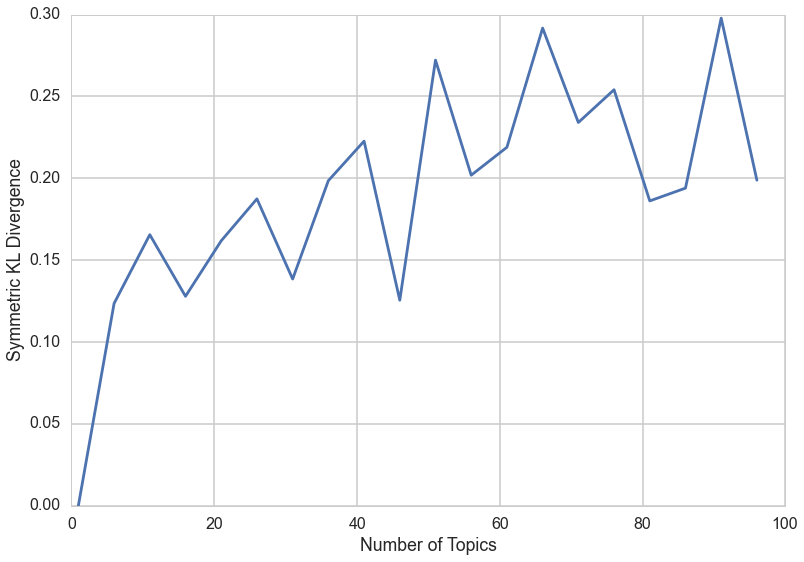

In [153]:
# Plot kl divergence against number of topics
x = np.arange(1,100,5)
plt.plot(x, kl)
plt.ylabel('Symmetric KL Divergence')
plt.xlabel('Number of Topics')
plt.savefig('kldiv1966.png', bbox_inches='tight')

## LDA

In [184]:
import gensim

In [158]:
lda1976 = models.ldamodel.LdaModel(corpus=corpus,
            id2word=dictionary,chunksize=220,num_topics=50)

In [159]:
lda1976.print_topics(num_topics=50)

[u'0.118*dept + 0.078*department + 0.075*cost + 0.052*council + 0.036*park + 0.034*college + 0.029*services + 0.026*plan + 0.021*unit + 0.018*asst',
 u'0.112*agency + 0.052*water + 0.041*act + 0.041*charge + 0.038*chemical + 0.034*standard + 0.029*notes + 0.026*supply + 0.023*atlanta + 0.019*federal',
 u'0.123*strike + 0.053*role + 0.046*position + 0.041*end + 0.033*dispute + 0.032*aide + 0.029*association + 0.025*executive + 0.021*hospitals + 0.021*pay',
 u'0.109*union + 0.063*worker + 0.063*labor + 0.043*employee + 0.039*contract + 0.038*leader + 0.030*treatment + 0.029*joseph + 0.027*workers + 0.023*agreement',
 u'0.077*house + 0.067*white + 0.049*mondale + 0.046*staff + 0.036*growth + 0.035*mass + 0.033*period + 0.030*problem + 0.028*lincoln + 0.027*adviser',
 u'0.088*business + 0.075*comr + 0.038*deputy + 0.033*feb + 0.032*side + 0.032*move + 0.029*dollar + 0.028*service + 0.028*industry + 0.026*government',
 u'0.097*dir + 0.068*june + 0.054*west + 0.027* + 0.027*point + 0.025*car

## Get topics of documents

In [189]:
for bow in corpus[0:900:15]:
    print bow
    print lda1976.get_document_topics(bow)
    print " ".join([dictionary[e[0]] for e in bow])
    print "=========================================="

[(0, 1), (20, 2), (110, 1), (1062, 3), (1227, 3), (1644, 1), (1908, 1), (2484, 1), (2493, 2), (3225, 2), (3535, 1), (3578, 1), (3761, 1), (4848, 1), (5324, 1), (5355, 1), (5519, 1), (6050, 1), (6367, 1)]
[(10, 0.043269166305564016), (13, 0.17416651643511288), (17, 0.28722346928793085), (27, 0.040190624548994101), (32, 0.11944897963915847), (40, 0.10845322802937959), (44, 0.19539616390200856)]
 appropriation modest research budget jan insts year increase carter natl washington president money asks proposal rise pres inflation
[(0, 1), (156, 3), (321, 1), (374, 2), (592, 2), (1080, 1), (1357, 1), (1644, 1), (1708, 1), (1818, 1), (2100, 1), (2762, 2), (2960, 1), (3290, 1), (3457, 1), (3620, 1), (4114, 1), (4615, 1), (4935, 1), (5097, 3), (5404, 3), (5521, 1), (5524, 1), (5656, 1), (5831, 1), (5850, 2), (6247, 1), (6366, 3), (6415, 1), (6424, 1), (6561, 2), (6775, 3), (6870, 1), (7073, 2), (7174, 3)]
[(2, 0.019266211207110383), (9, 0.66842570455984573), (12, 0.020443711912058654), (18, 0.1

### create dataframe for topics and probabilities

In [ ]:
topicdf = pd.DataFrame(colnames=["Topic"+str(i) for i in range(0,n)])

In [ ]:
for bow in corpus : 
    topics = lda1976.get_document_topics(bow)
    for t in topics :
        topicdf["Topic"+str(t[0])] = t[1]

In [ ]:
#group by month
df['yaer'] = df['date'].dt.
#weightsum = [sum(topicdf["Topic"+str(i)] for i in range(0,n))]